In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


 # <h1 style='background:#682F2F; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>DIAMOND PRICE PREDICTION: REGRESSION</center></h1> 
 
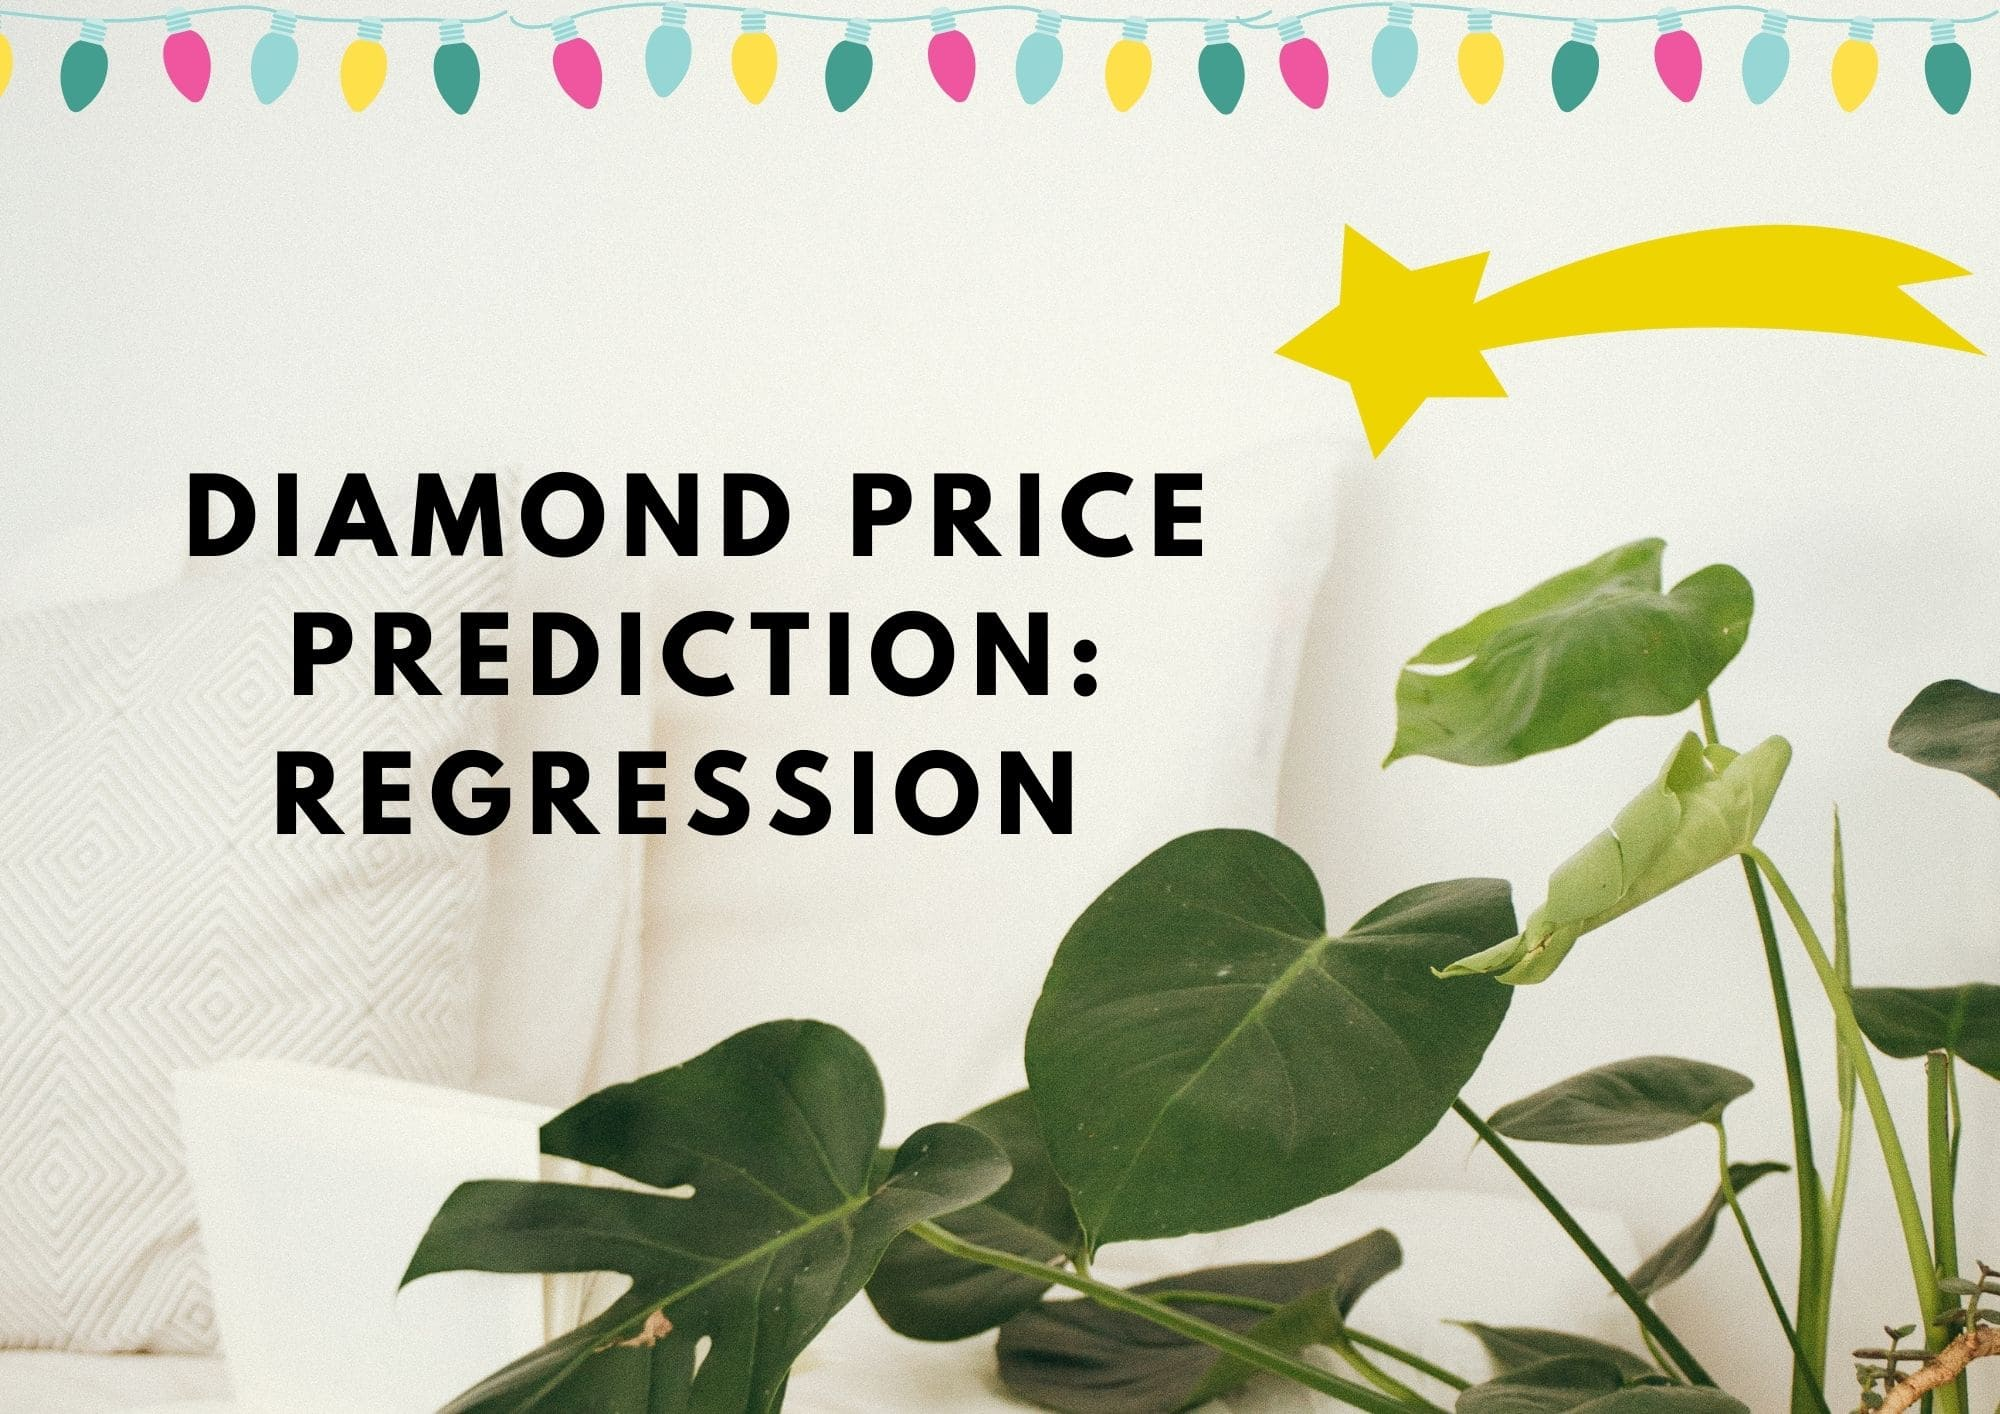

<h1 style='background:#682F2F; border:0; border-radius: 10px; color:white'><center>TABLE OF CONTENTS</center></h1>

### [**1. IMPORTING LIBRARIES**](#title-one)
    
### [**2. LOADING DATA**](#title-two)

### [**3. DATA ANALYSIS**](#title-three)

### [**4. DATA PREPROCESSING**](#title-four)

### [**5. MODEL BUILDING**](#title-five) 

### [**6. END**](#title-six)

<a id = "title-one"></a>
<h1 style='background:#682F2F; border:0; border-radius: 10px; color:white'><center>IMPORTING LIBRARIES</center></h1>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

<a id = "title-two"></a>
<h1 style='background:#682F2F; border:0; border-radius: 10px; color:white'><center>LOADING DATA</center></h1>


In [3]:
data_df = pd.read_csv("../input/diamonds/diamonds.csv")
data_df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11106,11107,1.05,Ideal,D,SI2,60.2,57.0,4932,6.58,6.65,3.98
24485,24486,1.51,Good,G,VS2,63.3,60.0,12756,7.20,7.28,4.58
29569,29570,0.41,Good,F,SI1,63.1,59.0,705,4.70,4.75,2.98
24627,24628,2.34,Good,J,VS2,63.9,62.0,12961,8.40,8.34,5.35
20963,20964,1.21,Good,E,VS2,62.7,61.0,9176,6.67,6.72,4.20
1594,1595,0.80,Ideal,D,SI1,62.2,57.0,3011,5.89,5.85,3.65
50677,50678,0.76,Premium,F,SI2,59.3,59.0,2287,5.97,5.93,3.53
45976,45977,0.30,Very Good,H,VS1,60.1,61.0,526,4.30,4.32,2.59
7519,7520,1.01,Premium,I,SI1,61.8,59.0,4242,6.44,6.37,3.96
4780,4781,0.97,Ideal,H,SI2,61.6,55.0,3694,6.37,6.32,3.91


# **<span style="color:#682F2F;"><center>LABELLED DIMENSIONS OF A DIAMOND</center></span>**

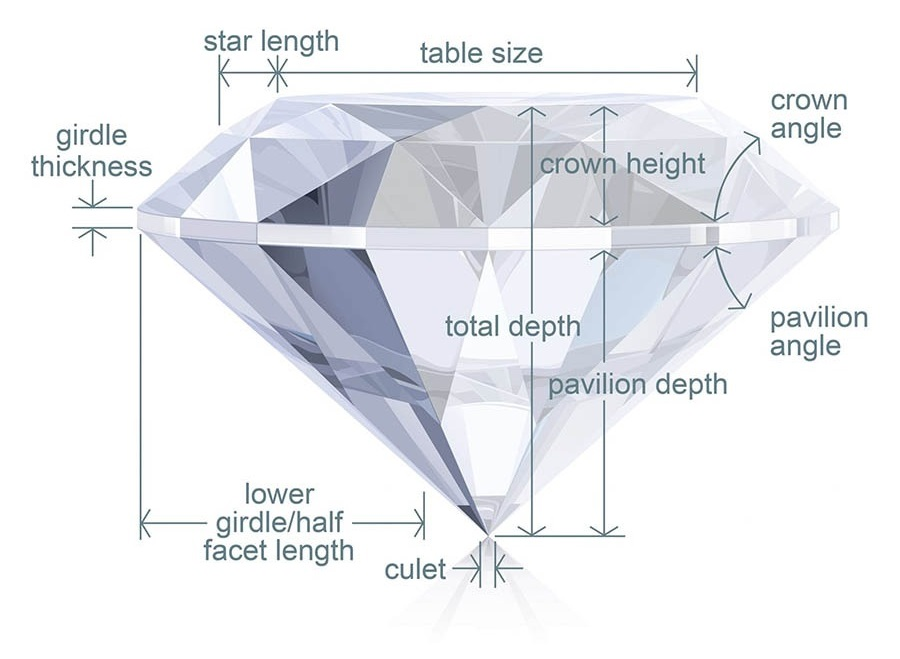

<div style="border-radius:10px;
            border : #682F2F solid;
            background-color:#FFF8DC;
           font-size:110%;
            text-align: left">
    
## <h2 style='border:0; color:#682F2F'><center>About the data (Description of attributes)</center></h2>

**This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.**

* **carat (0.2-5.01):** The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points. 
* **cut (Fair, Good, Very Good, Premium, Ideal):** The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade. 
* **color (from J (worst) to D (best)):** The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds. 
* **clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):** Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification. 
* **depth (43-79)**: It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above. 
* **table (43-95):** It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous. 
* **price ($$326 - $18826):** It is the price of the diamond in US dollars. **It is our very target column in the dataset.**
* **x (0 - 10.74):** Length of the diamond (in mm) 
* **y (0 - 58.9):** Width of the diamond (in mm) 
* **z (0 - 31.8):** Depth of the diamond (in mm) 

<a id = "title-three"></a>
<h1 style='background: #682F2F; border:0; border-radius: 10px; color:white'><center>DATA ANALYSIS</center></h1>

### **<span style="color:#682F2F;"><center>Checking for missing values & categorical variables</center></span>**

In [4]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### **<span style="color:#682F2F;">Note: </span>**
##### There are 53940 non-null values in all the attributes thus no missing values.
##### Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms. 

### **<span style="color:#682F2F;"><center>Evaluating categorical features</center></span>**

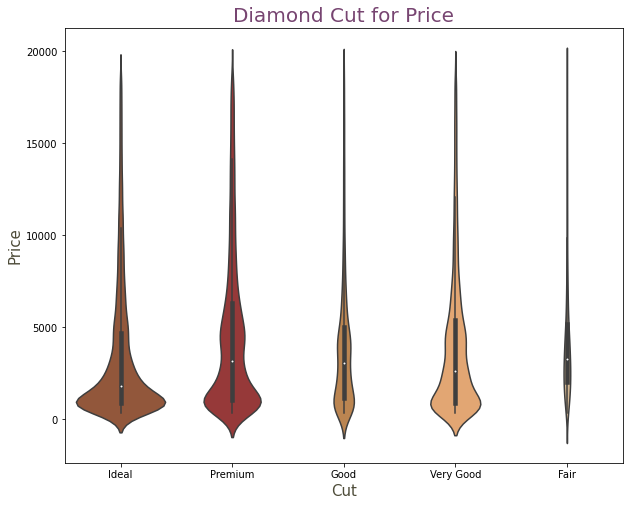

In [5]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

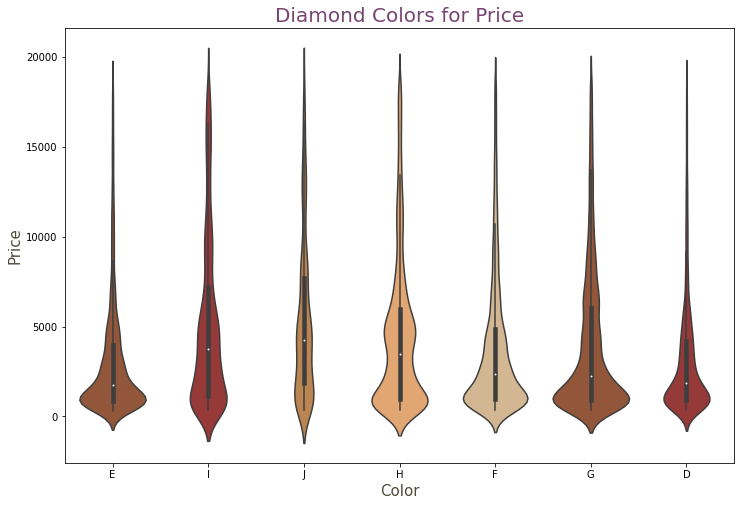

In [6]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

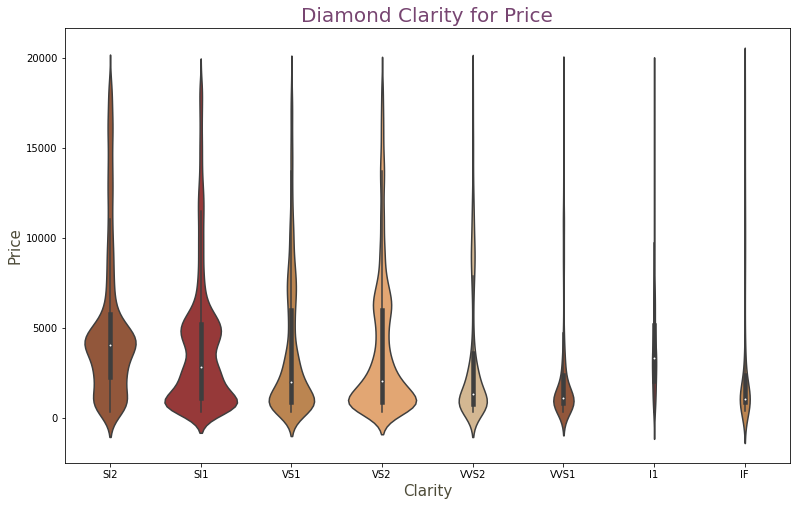

In [7]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=data_df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

### **<span style="color:#682F2F;">Note: </span>**
##### "Ideal" diamond cuts are the most in the number while the "Fair" is the least. More diamonds of all of such cuts for lower price category. 
##### "J" color diamond which is worst are most rare however, "H" and "G" are more in number eventhough they're of inferior quality as well.
##### Diamonds of "IF" clarity which is best as well as "I1" which is worst are very rare and rest are mostly of in-between clarities. 

### **<span style="color:#682F2F;"><center>Descriptive Statistics</center></span>**

In [8]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


### **<span style="color:#682F2F;">Note: </span>**
##### "Price" as expected is right skewed, having more number of data points in left 
##### Under dimensional features of 'x', 'y' & 'z' - min value is 0 thus making such datapoints either a 1D or 2D diamond object which doesn't make much sense - so needs either to be imputed with appropriate value or dropped altogether.

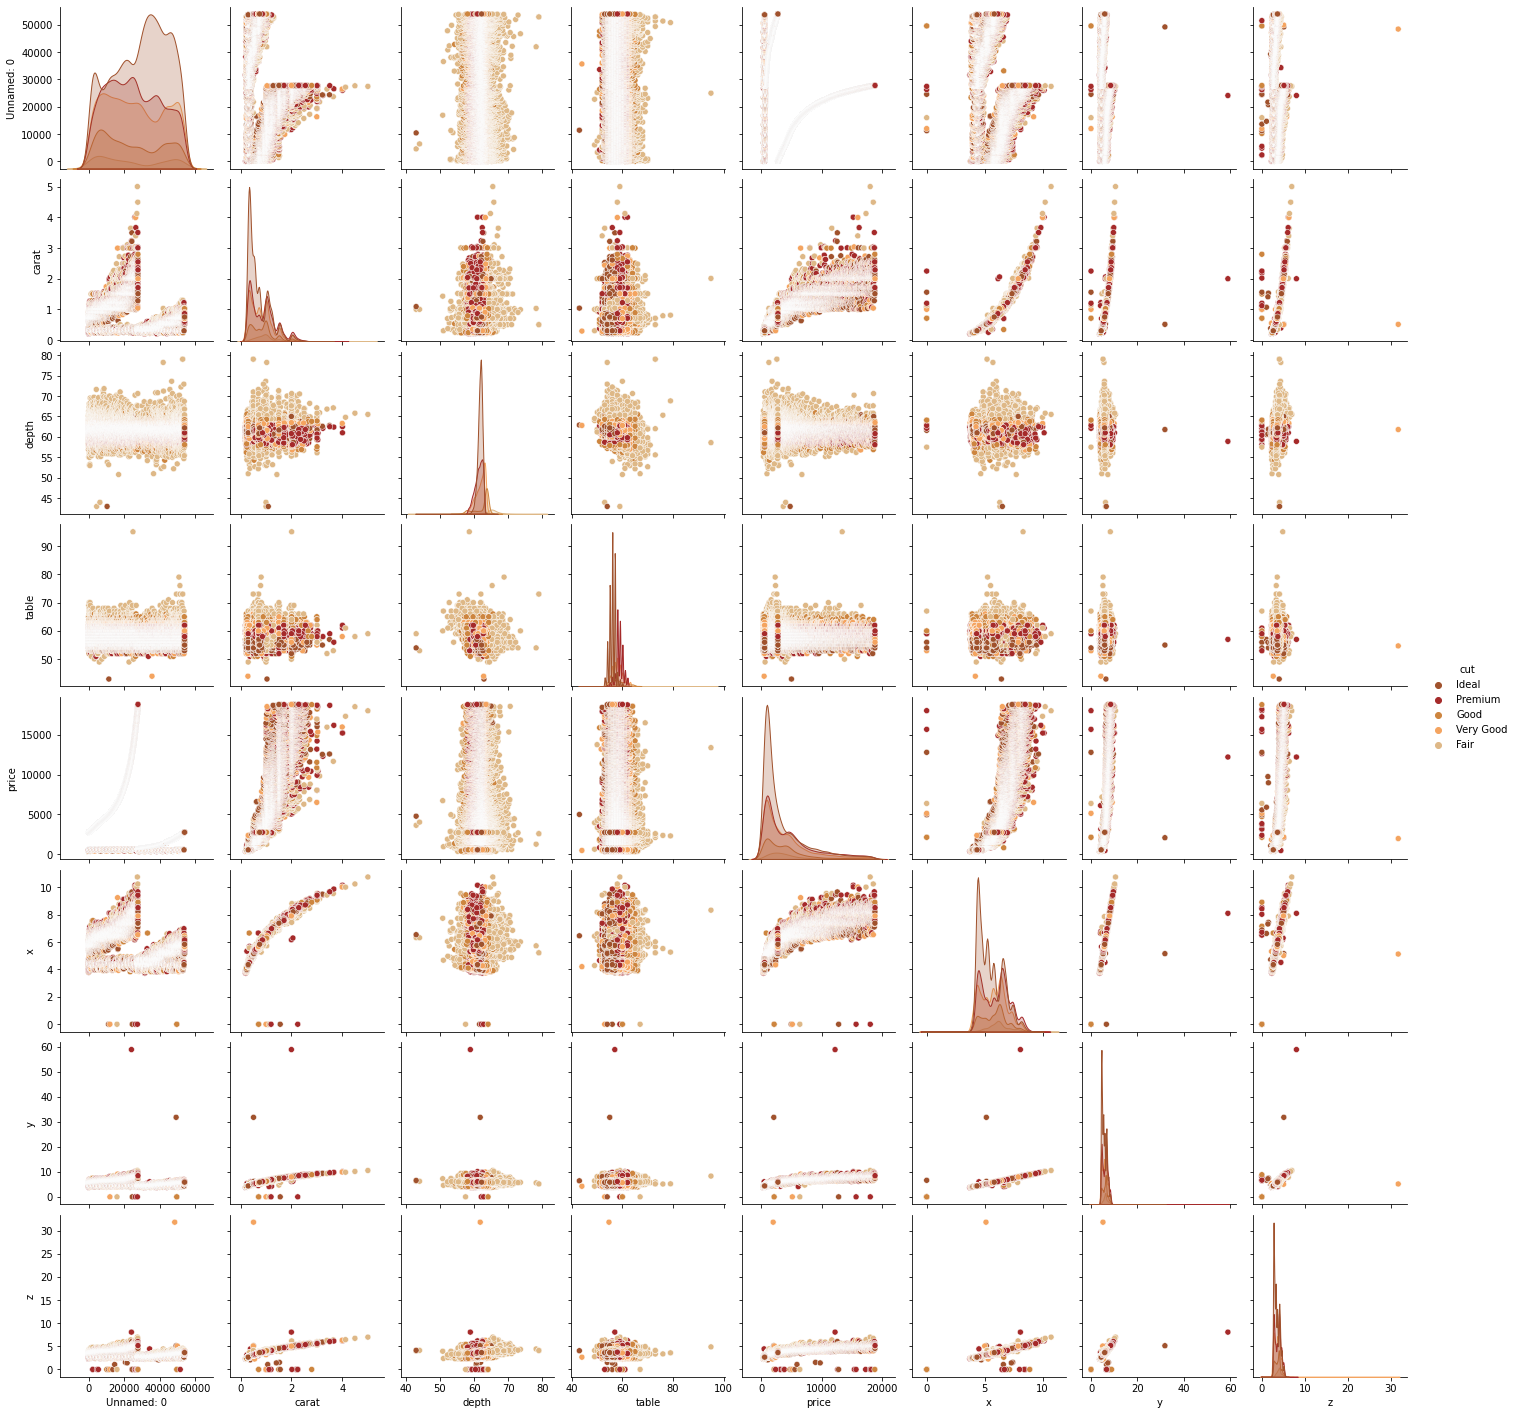

In [9]:
#Doing Bivariate Analysis by examaning a pairplot  
ax = sns.pairplot(data_df, hue= "cut", palette = cols)

### **<span style="color:#682F2F;">Note: </span>**
##### There's a useless feature "unnamed" which is just an index and needs to be eliminated altogether. 
##### Features are having datapoints that are far from the rest of the dataset (outliers) which needs to be dealth with or else would affect our model.
##### "y" and "z" have some dimensional outliers in our dataset that needs to be eliminated.
##### Features "depth" & "table" should be capped after we confirm by examining the Line plots.

### **<span style="color:#682F2F;"><center>Checking for Potential Outliers</center></span>**

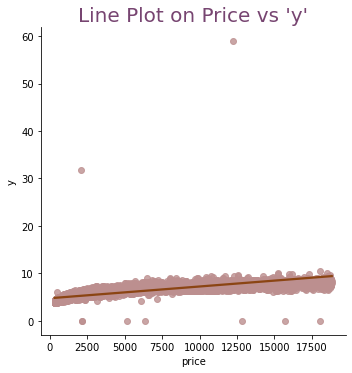

In [10]:
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

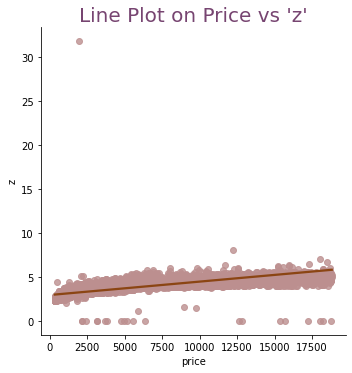

In [11]:
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

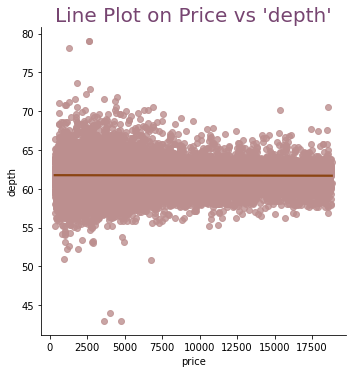

In [12]:
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

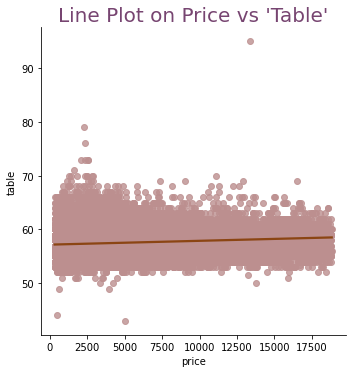

In [13]:
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

### **<span style="color:#682F2F;">Note: </span>**
##### In the Line plots of above features, we can easily spot the outliers which we'll drop before feeding the data to the algorithm.

<a id = "title-four"></a>
<h1 style='background: #682F2F; border:0; border-radius: 10px; color:white'><center>DATA PREPROCESSING</center></h1>

### **<span style="color:#682F2F;"><center>Data Cleaning</center></span>**

In [14]:
# Removing the feature "Unnamed"
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [15]:
# Removing the datapoints having min 0 value in either x, y or z features 
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)

### **<span style="color:#682F2F;"><center>Removing Outliers</center></span>**

In [16]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape 

(53909, 10)

### **<span style="color:#682F2F;"><center>Encoding Categorical Variables</center></span>**

In [17]:
# Making a copy to keep original data in its form intact
data1 = data_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


### **<span style="color:#682F2F;">Note: </span>**
##### As categorical features have been converted into numerical columns, we are getting 5-point summary along with count, mean & std for them as well. 
##### Now, we may analyze correlation matrix after getting done with pre-processing for possible feature selection in order to make our dataset more cleaner, optimal before we feed it into algorithm.

### **<span style="color:#682F2F;"><center>Correlation Matrix</center></span>**

<AxesSubplot:>

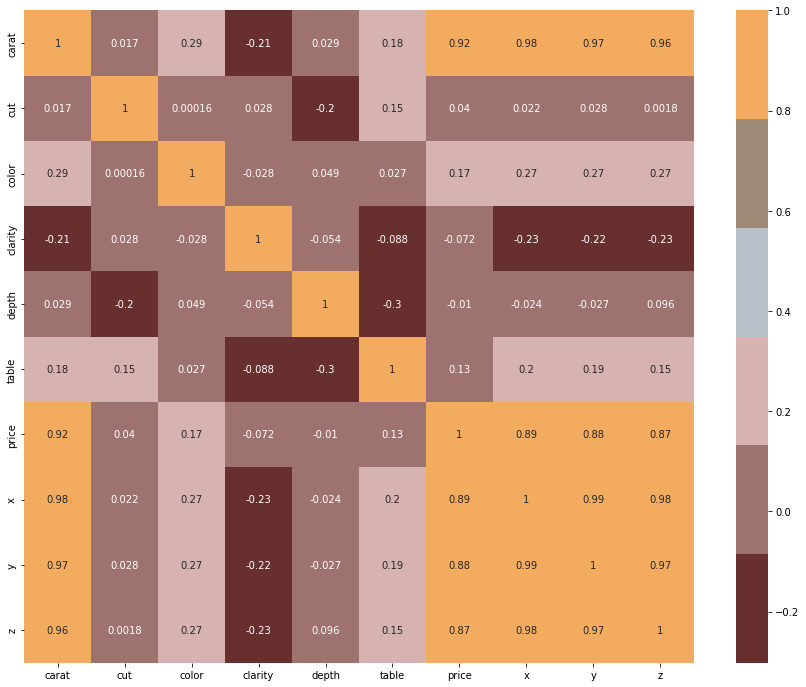

In [18]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

### **<span style="color:#682F2F;">Note: </span>**
##### Features "carat", "x", "y", "z" are highly correlated to our target variable, price. 
##### Features "cut", "clarity", "depth" are very low correlated (<|0.1|) thus may be removed though due to presence of only few selected features, we won't be doing that.

<a id = "title-five"></a>
<h1 style='background: #682F2F; border:0; border-radius: 10px; color:white'><center>MODEL BUILDING</center></h1>

In [19]:
# Defining the independent and dependent variables
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [20]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [21]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1383.854012 
Lasso: 1366.991298 
DecisionTree: 739.608456 
RandomForest: 548.699990 
KNeighbors: 816.558280 
XGBRegressor: 541.128045 


In [22]:
# Model prediction on test data with XGBClassifier which gave us the least RMSE 
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.982778536365611
Adjusted R^2: 0.9827641478423368


## **<span style="color:#682F2F;">Great! We got 98.27% accuracy with it. We can take the model into production. </span>**

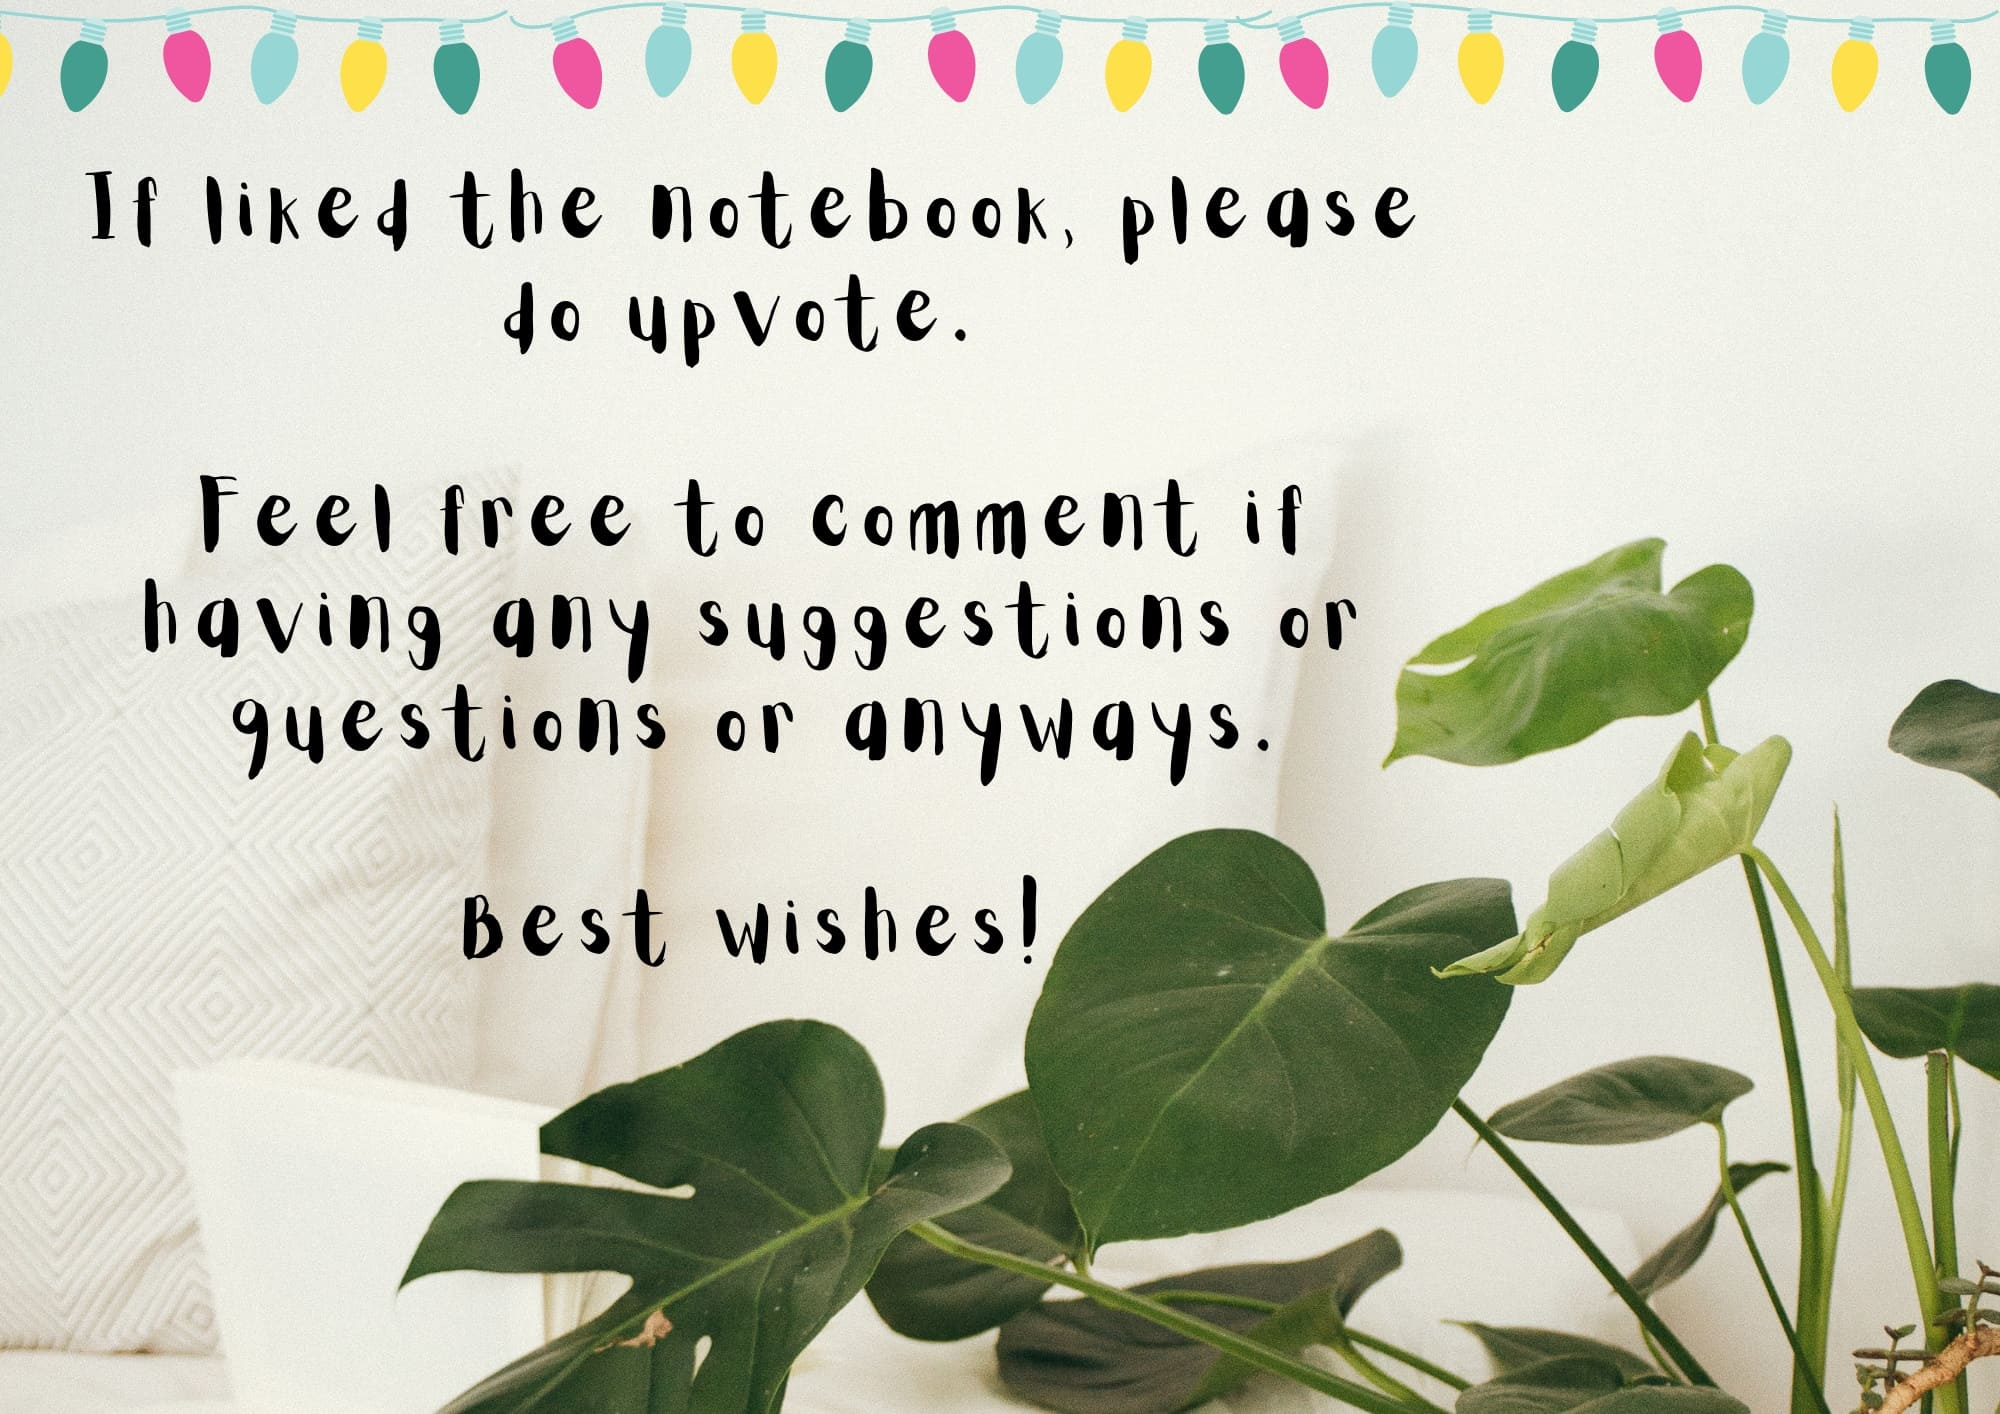




<a id = "title-six"></a>
<h1 style='background: #682F2F; border:0; border-radius: 10px; color:white'><center>END</center></h1>